# Clustering analysis with cell latent representations

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import scanpy as sc

from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import adjusted_mutual_info_score
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import normalized_mutual_info_score

In [5]:
def sc_clustering(adata, cluster_num, method = "louvain", min_res = 0, max_res = 3, max_iter = 100, adjacency = None):
    
    for iter in range(max_iter):
        
        print('Iter %s:' % iter)
        res = min_res + ((max_res-min_res)/2.0)
        if method == "louvain":
            sc.tl.louvain(adata, resolution = res, adjacency = adjacency)
            cls_num = adata.obs['louvain'].nunique()
        elif method == "leiden":
            sc.tl.leiden(adata,resolution = res, adjacency = adjacency)
            cls_num = adata.obs['leiden'].nunique()
        else:
            sys.exit("ERR: the method param should be in ('louvain', 'leiden').")
        
        print('%s found at resolution %s. ' % (cls_num, res))
        if cls_num > cluster_num:
            max_res = res
        elif cls_num < cluster_num:
            min_res = res
        else:
            break
    
    print('INFO: %s found at resolution %s.' % (cls_num, res))
    return(res, adata)

In [14]:
adata.obs['label'].head(50)

0                          NaN
1            pancreatic B cell
2           pancreatic PP cell
3            pancreatic B cell
4                          NaN
5                          NaN
6                          NaN
7                          NaN
8            pancreatic B cell
9                          NaN
10                         NaN
11                         NaN
12                         NaN
13                         NaN
14                         NaN
15                         NaN
16                         NaN
17                         NaN
18           pancreatic A cell
19                         NaN
20           pancreatic A cell
21                         NaN
22                         NaN
23                         NaN
24           pancreatic B cell
25           pancreatic B cell
26                         NaN
27                         NaN
28                         NaN
29                         NaN
30           pancreatic B cell
31                         NaN
32      

In [11]:
os.chdir("/Users/zhaokai/data/Results/single_cell/DM")
cluster_num = 8
np.random.seed(0)
cell_factor = pd.read_csv("cell_factor.csv", header = 0)
cell_factor.head(5)
["metagene" + str(i) for i in range(cell_factor.columns)]

TypeError: 'Index' object cannot be interpreted as an integer

In [12]:
os.chdir("/Users/zhaokai/data/Results/single_cell/DM")
cluster_num = 8
np.random.seed(0)
cell_factor = pd.read_csv("cell_factor.csv", header = 0)
# cell_factor.columns =["metagene" + str(i) for i in range(cell_factor.columns)]


row_std = cell_factor.apply(lambda x: np.sqrt(np.dot(x, x)), axis = 1)
norm_cell_factor = cell_factor.apply(lambda x: x/row_std, axis = 0)


meta = pd.read_csv("ExpDesign-E-HCAD-31.txt", header=0, sep='\t', usecols=[0, 27])
ext = ~pd.isna(meta.iloc[:,1]).values

selected = norm_cell_factor
adata = sc.AnnData(selected)
adata.obs['label'] = meta.iloc[:,1].values
sc.pp.  (adata, n_neighbors=20, use_rep='X')
res, adata = sc_clustering(adata, cluster_num)
sc.tl.umap(adata)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


Iter 0:
19 found at resolution 1.5. 
Iter 1:
11 found at resolution 0.75. 
Iter 2:
8 found at resolution 0.375. 
INFO: 8 found at resolution 0.375.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'label' as categorical


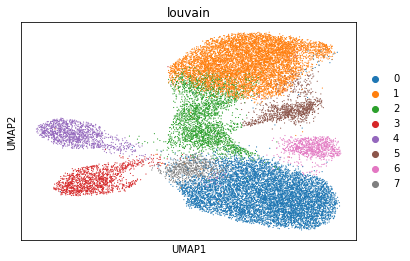

In [13]:
sc.pl.umap(adata, color=['louvain'])

In [10]:
adjusted_rand_score(adata.obs['label'], adata.obs['louvain'])

ValueError: Input contains NaN